## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Getting Data

In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

## Knowing Our Data

In [3]:
df.dtypes

bedroom                int64
bathrooms              int64
area                 float64
furnishing            object
avalable_for          object
address               object
floor_number           int64
facing                object
floor_type            object
gate_community        object
corner_pro            object
parking                int64
wheelchairadption     object
petfacility           object
aggDur                 int64
noticeDur              int64
lightbill              int64
powerbackup            int64
propertyage           object
no_room                int64
pooja_room             int64
study_room             int64
others                 int64
servant_room           int64
store_room             int64
maintenance_amt       object
brok_amt               int64
deposit_amt            int64
mnt_amt              float64
rent                 float64
dtype: object

In [4]:
#Checking for Null Values
df.isnull().sum()

bedroom              0
bathrooms            0
area                 0
furnishing           0
avalable_for         0
address              0
floor_number         0
facing               0
floor_type           0
gate_community       0
corner_pro           0
parking              0
wheelchairadption    0
petfacility          0
aggDur               0
noticeDur            0
lightbill            0
powerbackup          0
propertyage          0
no_room              0
pooja_room           0
study_room           0
others               0
servant_room         0
store_room           0
maintenance_amt      0
brok_amt             0
deposit_amt          0
mnt_amt              0
rent                 0
dtype: int64

In [5]:
df.describe()

,bedroom,bathrooms,area,floor_number,parking,aggDur,noticeDur,lightbill,powerbackup,no_room,pooja_room,study_room,others,servant_room,store_room,brok_amt,deposit_amt,mnt_amt,rent
count,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,1.088400e+04,10884.000000,1.088400e+04
mean,1.797868,1.779677,528.558560,3.062018,0.884693,7.423649,0.722345,0.172639,0.712422,0.750276,0.062201,0.048144,0.124495,0.032157,0.045296,7075.270764,3.670939e+04,257.493025,2.855947e+04
std,0.807328,0.832231,930.460935,2.390430,0.559457,7.670543,0.698966,0.377952,0.842667,0.432873,0.241532,0.214080,0.330160,0.176426,0.207962,17269.507644,5.589578e+04,1247.938097,1.183249e+06
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.600000e+03
25%,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+00,0.000000,1.050000e+04
50%,2.000000,2.000000,510.000000,3.000000,1.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000e+04,0.000000,1.500000e+04
75%,2.000000,2.000000,840.000000,5.000000,1.000000,11.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9000.000000,5.000000e+04,0.000000,2.100000e+04
max,22.000000,22.000000,72775.000000,9.000000,9.000000,36.000000,6.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,275000.000000,1.500000e+06,40000.000000,1.234568e+08


In [6]:
# Knowing which columns are categorical and which are numeric
num_cols = [feature for feature in df.columns if df[feature].dtypes!='O']
cat_cols = [feature for feature in df.columns if df[feature].dtypes=='O']
print(f"Numeric:{num_cols}\n\nCategorical:{cat_cols}" )

Numeric:['bedroom', 'bathrooms', 'area', 'floor_number', 'parking', 'aggDur', 'noticeDur', 'lightbill', 'powerbackup', 'no_room', 'pooja_room', 'study_room', 'others', 'servant_room', 'store_room', 'brok_amt', 'deposit_amt', 'mnt_amt', 'rent']

Categorical:['furnishing', 'avalable_for', 'address', 'facing', 'floor_type', 'gate_community', 'corner_pro', 'wheelchairadption', 'petfacility', 'propertyage', 'maintenance_amt']


## Modifying Address so it represents area

In [7]:
df['location'] = [ele.split(",")[1].lstrip() for ele in df["address"]]
df_test['location'] = [ele.split(",")[1].lstrip() for ele in df_test["address"]]

In [8]:
df.drop(["address"],inplace=True,axis=1)
df_test.drop(["address"],inplace=True,axis=1)

In [9]:
q1 = df.quantile(0.15)
q3 = df.quantile(0.85)
iqr = q3 - q1
threshold_factor = 1.5
threshold = iqr * threshold_factor
df = df[~((df < (q1 - threshold)) | (df > (q3 + threshold))).any(axis=1)]

C:\Users\chana\AppData\Local\Temp\ipykernel_9648\256975099.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = df.quantile(0.15)
C:\Users\chana\AppData\Local\Temp\ipykernel_9648\256975099.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = df.quantile(0.85)
C:\Users\chana\AppData\Local\Temp\ipykernel_9648\256975099.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (q1 - threshold)) | (df > (q3 + threshold))).any(axis=1)]


In [10]:
df.head(5)

,bedroom,bathrooms,area,furnishing,avalable_for,floor_number,facing,floor_type,gate_community,corner_pro,...,study_room,others,servant_room,store_room,maintenance_amt,brok_amt,deposit_amt,mnt_amt,rent,location
0,2,2,1050.0,Unfurnished,All,5,West,Marble,Yes,No,...,0,0,0,0,0,0,3,0.0,20000.0,Pingale Wasti
1,2,2,760.0,Unfurnished,All,5,East,Vitrified,Yes,Yes,...,0,0,0,0,0,0,40000,0.0,14000.0,Wagholi
3,1,1,628.0,Furnished,Family Only,3,East,Mosaic,Yes,No,...,0,0,0,0,0,0,40000,0.0,13000.0,Wanowrie
4,2,2,668.0,Semifurnished,"Family , Bachelors (Men Only)",6,South,Polished concrete,Yes,Yes,...,0,0,0,0,0,0,20,0.0,7500.0,Uruli Devachi
5,2,2,950.0,Semifurnished,Family Only,1,No Direction,Ceramic,No,No,...,0,0,0,0,0,0,50000,0.0,17000.0,Baner


C:\Users\chana\AppData\Local\Temp\ipykernel_9648\2232350290.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True,vmax=1,vmin=-1, cmap="coolwarm")


<AxesSubplot: >

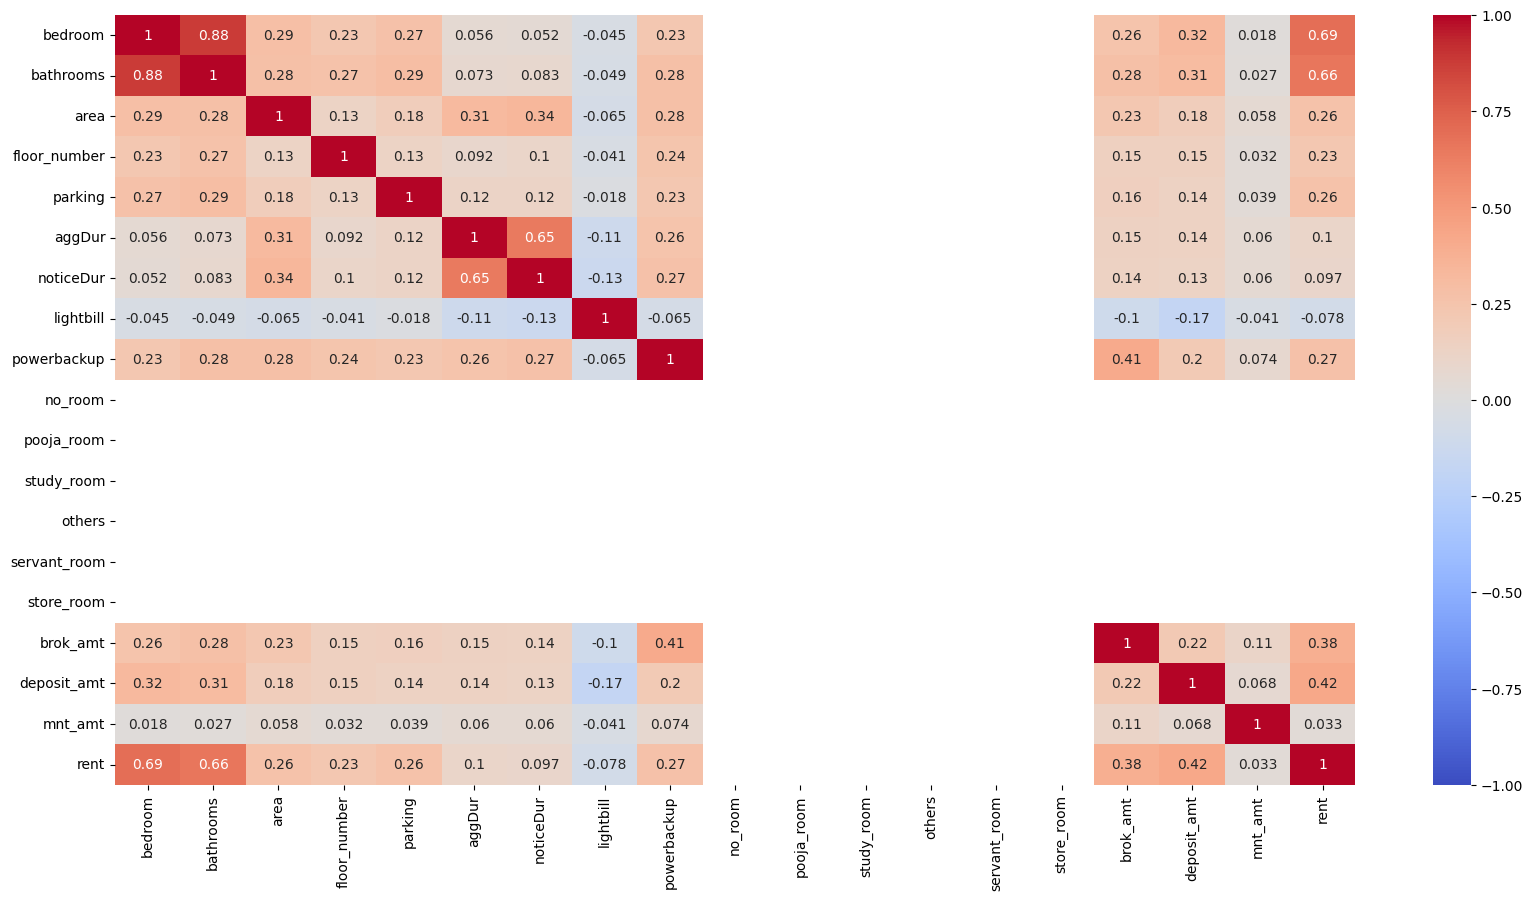

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True,vmax=1,vmin=-1, cmap="coolwarm")

In [12]:
print(len(df.columns),len(df_test.columns))

30 30


## Encoding for Categorical Data

In [13]:
df['furnishing'].unique()

array(['Unfurnished', 'Furnished', 'Semifurnished', 'Unfurnishe'],
      dtype=object)

In [14]:
df['furnishing'].replace({'Unfurnished': -1, 'Semifurnished': 0, 'Furnished': 1, 'Unfurnishe':-1}, inplace=True)
df_test['furnishing'].replace({'Unfurnished': -1, 'Semifurnished': 0, 'Furnished': 1, 'Unfurnishe':-1}, inplace=True)

In [15]:
df['propertyage'].unique()

array(['5 to 10 Year Old', '1 to 5 Year Old', '10+ Year Old',
       '0 to 1 Year Old', 'Under Construction', 'NO age'], dtype=object)

In [16]:
mapping = {'1 to 5 Year Old': 1, '0 to 1 Year Old': 2, '5 to 10 Year Old': 3, '10+ Year Old': 4, 'Under Construction': 5, 'NO age': 6}
df['propertyage'] = df['propertyage'].replace(mapping)
df_test['propertyage'] = df_test['propertyage'].replace(mapping)

In [17]:
df['avalable_for'].unique()

array(['All', 'Family Only', 'Family , Bachelors (Men Only)',
       'Family , Bachelors (Women Only)', 'Bachelors (Men/Women)',
       'Bachelors (Women Only)', 'Bachelors (Men Only)', 'None'],
      dtype=object)

In [18]:
mapping = {'All': 0, 'Family Only': 1, 'Family , Bachelors (Men Only)': 2, 'None': 3, 'Family , Bachelors (Women Only)': 2, 'Bachelors (Men/Women)': 4, 'Bachelors (Men Only)': 4, 'Bachelors (Women Only)': 4}

# Create a new column with the grouped categories
df['avalable_for'] = df['avalable_for'].replace(mapping)
df_test['avalable_for'] = df_test['avalable_for'].replace(mapping)

In [19]:
print(len(df.columns),len(df_test.columns))

30 30


In [20]:
df = pd.get_dummies(df, columns=['location'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['location'], drop_first=True)
df_test = df_test.reindex(columns=df.columns, fill_value=0)

In [21]:
print(len(df.columns),len(df_test.columns))

886 886


In [22]:
df.head(10)

,bedroom,bathrooms,area,furnishing,avalable_for,floor_number,facing,floor_type,gate_community,corner_pro,...,location_tushar park,location_uttkarsh society katraj,location_vadgaon budruk,location_vadgaonsheri,location_vishrantwadi,location_vithai nagar,location_wadgaon sheri,location_wadgaonsheri,location_waghere Colony no.4,location_wagholi
0,2,2,1050.0,-1,0,5,West,Marble,Yes,No,...,0,0,0,0,0,0,0,0,0,0
1,2,2,760.0,-1,0,5,East,Vitrified,Yes,Yes,...,0,0,0,0,0,0,0,0,0,0
3,1,1,628.0,1,1,3,East,Mosaic,Yes,No,...,0,0,0,0,0,0,0,0,0,0
4,2,2,668.0,0,2,6,South,Polished concrete,Yes,Yes,...,0,0,0,0,0,0,0,0,0,0
5,2,2,950.0,0,1,1,No Direction,Ceramic,No,No,...,0,0,0,0,0,0,0,0,0,0
7,2,2,900.0,-1,0,1,No Direction,Not provided,No,No,...,0,0,0,0,0,0,0,0,0,0
10,2,2,0.0,0,1,3,South-East,Not provided,Yes,No,...,0,0,0,0,0,0,0,0,0,0
11,2,2,1000.0,-1,0,2,North-East,Mosaic,Yes,Yes,...,0,0,0,0,0,0,0,0,0,0
12,3,3,1500.0,0,0,1,East,Not provided,Yes,No,...,0,0,0,0,0,0,0,0,0,0
13,2,2,0.0,-1,0,2,No Direction,Not provided,No,No,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df.dtypes

bedroom                           int64
bathrooms                         int64
area                            float64
furnishing                        int64
avalable_for                      int64
                                 ...   
location_vithai nagar             uint8
location_wadgaon sheri            uint8
location_wadgaonsheri             uint8
location_waghere Colony no.4      uint8
location_wagholi                  uint8
Length: 886, dtype: object

In [24]:
integer_columns = df.select_dtypes(include=['int','float','uint8']).columns.tolist()
short_df = df[integer_columns]

In [25]:
short_df.columns

Index(['bedroom', 'bathrooms', 'area', 'furnishing', 'avalable_for',
       'floor_number', 'parking', 'aggDur', 'noticeDur', 'lightbill',
       ...
       'location_tushar park', 'location_uttkarsh society katraj',
       'location_vadgaon budruk', 'location_vadgaonsheri',
       'location_vishrantwadi', 'location_vithai nagar',
       'location_wadgaon sheri', 'location_wadgaonsheri',
       'location_waghere Colony no.4', 'location_wagholi'],
      dtype='object', length=879)

In [26]:
X_train = short_df.drop('rent', axis=1)
Y_train = short_df['rent']

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)

In [28]:
reg = linear_model.LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

In [29]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)

RandomForestRegressor()

In [30]:
reg.coef_

array([ 4.14095956e+03,  1.82957948e+03, -1.11636695e-01,  1.74424740e+03,
       -3.72219559e+02,  9.43157401e+01,  5.93914883e+02,  7.87896965e+00,
       -6.81076321e+01,  3.63418876e+01,  1.82537501e+02,  1.91843338e+02,
       -1.65394907e+11, -9.00235649e+11,  1.59432256e+12,  3.72285927e+11,
        8.28727024e+11, -2.14322874e+10,  6.79647781e-02,  3.08599851e-02,
       -9.31013295e+02, -5.58577232e+03, -3.68598700e+03,  1.57899876e+03,
        4.89757254e+03,  4.28729778e+02,  2.62012861e+03, -1.01014633e+03,
        1.12184015e+03, -7.78735744e+02, -2.37814380e+03, -9.44557865e+02,
        6.30942783e+02, -1.02357662e+03, -2.83867907e+03, -2.94031343e+03,
       -2.86335368e+03, -2.54932254e+03, -4.30089521e+03, -2.87725246e+03,
        9.86732946e+02,  3.37547326e+03,  1.55718424e+03, -3.65839284e+03,
       -1.61432493e+03,  1.05946119e+04,  1.27004235e+03,  3.10417379e+02,
       -4.68835153e+03,  7.17024419e+03,  5.46034933e+03,  1.06934360e+03,
        2.18196326e+03,  

In [31]:
reg.intercept_

165394909728.18085

In [32]:
integer_columns = df_test.select_dtypes(include=['int','float','uint8']).columns.tolist()
test_df = df[integer_columns]

In [33]:
X_test = test_df.drop('rent', axis=1)
Y_test = test_df['rent']

In [34]:
scaler = StandardScaler()
scaled_X_test = scaler.fit_transform(X_test)

In [35]:
predicted = reg.predict(X_test)

In [36]:
predicted_rf = rf.predict(X_test)

In [37]:
from sklearn.metrics import r2_score, mean_absolute_error
print(mean_absolute_error(Y_test,predicted))
print('R^2: %.2f' % r2_score(Y_test,predicted))

2360.2866485799536
R^2: 0.76


In [38]:
mae = mean_absolute_error(Y_test,predicted)
mape = 100 * (mae / test_df['rent'].mean())
print(f"MAPE: {mape}%")

MAPE: 15.352958573622663%


In [39]:
from sklearn.metrics import r2_score, mean_absolute_error
print(mean_absolute_error(Y_test,predicted_rf))
print('R^2: %.2f' % r2_score(Y_test,predicted_rf))

819.3468102767393
R^2: 0.97


In [40]:
mae = mean_absolute_error(Y_test,predicted_rf)
mape = 100 * (mae / test_df['rent'].mean())
print(f"MAPE: {mape}%")

MAPE: 5.329605894765763%
